### 필수 패키지를 추가하세요.
 - numpy
 - pandas

In [90]:
# Code here
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

<br/>
<br/>
<br/>
<br/>

### 파일 읽기
 - red_wine.csv을 읽어서 red_wine에 저장한 후 상위 5개를 출력하세요.
 - white_wine.csv을 읽어서 white_wine 저장한 후 상위 5개를 출력하세요.
 - 이 데이터는 쉼표(',')가 아닌 세미콜론(';')으로 데이터를 구분하고 있기 때문에 sep=';' 을 적용해야 합니다.

In [91]:
# Code here
red_wine = pd.read_csv('red_wine.csv',sep=';')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [92]:
# Code here
white_wine = pd.read_csv('white_wine.csv',sep=';') 
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<br/>
<br/>
<br/>
<br/>

### 데이터 확인
 - red_wine과 white_wine의 정보를 조회하세요

In [93]:
# red_wine 정보
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [94]:
# white_wine 정보
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<br/>
<br/>
<br/>
<br/>

### 데이터 크기 줄이기 (타입 변경)
 - red_wine과 white_wine의 각 열 별 최대/최소를 출력하세요.
   - df.agg([함수1, 함수2, 함수3..]) 적용
 - 'quality'를 제외한 나머지 열을 float32로 변경하세요.
 - 'quality' 열은 uint8로 변경하세요.
 - 정보를 출력하여 줄어든 크기를 확인하세요.

In [95]:
# red_wine 최대 / 최소
red_wine.agg(['max','min'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
max,15.9,1.58,1.0,15.5,0.611,72.0,289.0,1.00369,4.01,2.00,14.9,8
min,4.6,0.12,0.0,0.9,0.012,1.0,6.0,0.99007,2.74,0.33,8.4,3


In [96]:
# white_wine 최대 / 최소
white_wine.agg(['max','min'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
max,14.2,1.10,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9
min,3.8,0.08,0.00,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3


In [97]:
# red_wine float 변환
red_wine.iloc[:,0:11] = red_wine.iloc[:,0:11].astype('float32')
red_wine.dtypes

fixed acidity           float32
volatile acidity        float32
citric acid             float32
residual sugar          float32
chlorides               float32
free sulfur dioxide     float32
total sulfur dioxide    float32
density                 float32
pH                      float32
sulphates               float32
alcohol                 float32
quality                   int64
dtype: object

In [98]:
# red_wine uint8 변환
red_wine.iloc[:,-1] = red_wine.iloc[:,-1].astype('uint8')
red_wine.dtypes

fixed acidity           float32
volatile acidity        float32
citric acid             float32
residual sugar          float32
chlorides               float32
free sulfur dioxide     float32
total sulfur dioxide    float32
density                 float32
pH                      float32
sulphates               float32
alcohol                 float32
quality                   uint8
dtype: object

In [99]:
# white_wine float 변환
white_wine.iloc[:,0:11] = white_wine.iloc[:,0:11].astype('float32')
white_wine.dtypes

fixed acidity           float32
volatile acidity        float32
citric acid             float32
residual sugar          float32
chlorides               float32
free sulfur dioxide     float32
total sulfur dioxide    float32
density                 float32
pH                      float32
sulphates               float32
alcohol                 float32
quality                   int64
dtype: object

In [100]:
# white_wine uint8 변환
white_wine.iloc[:,-1] = white_wine.iloc[:,-1].astype('uint8')
white_wine.dtypes

fixed acidity           float32
volatile acidity        float32
citric acid             float32
residual sugar          float32
chlorides               float32
free sulfur dioxide     float32
total sulfur dioxide    float32
density                 float32
pH                      float32
sulphates               float32
alcohol                 float32
quality                   uint8
dtype: object

In [101]:
# 두 데이터프레임 정보 조회
red_wine.info()
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float32
 1   volatile acidity      1599 non-null   float32
 2   citric acid           1599 non-null   float32
 3   residual sugar        1599 non-null   float32
 4   chlorides             1599 non-null   float32
 5   free sulfur dioxide   1599 non-null   float32
 6   total sulfur dioxide  1599 non-null   float32
 7   density               1599 non-null   float32
 8   pH                    1599 non-null   float32
 9   sulphates             1599 non-null   float32
 10  alcohol               1599 non-null   float32
 11  quality               1599 non-null   uint8  
dtypes: float32(11), uint8(1)
memory usage: 70.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column         

<br/>
<br/>
<br/>
<br/>

### 데이터 분류 기준 추가
 - red_wine에 새 열 'type'을 추가하고 값을 'red'로 설정하세요.
 - white_wine에 새 열 'type'을 추가하고 값을 'white'로 설정하세요.

In [102]:
# Code here
red_wine['type'] = 'red'
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [103]:
# Code here
white_wine['type'] = 'white'
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.600000,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.000000,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.200000,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.100000,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<br/>
<br/>
<br/>
<br/>

### 데이터 병합
 - red_wine과 white_wine의 열 label을 출력하세요.
 - red_wine과 white_wine을 상하로 결합하여 wine에 저장하세요.
 - 병합된 wine 데이터프레임의 열 label을 앞에서부터 순서대로 다음과 같이 변경하세요.
   - '산도', '향', '신선함', '단 맛', '짠 맛', '황 화합물1', '황 화합물2',
     '무게감', '신 맛', '황 화합물3', '알코올', '품질', '유형'

In [104]:
# red_wine 열 label
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [105]:
# white_wine 열 label
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [106]:
# 두 데이터프레임 결합
wine = pd.concat([red_wine,white_wine])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [107]:
# 열 label 변경
wine.columns=['산도', '향', '신선함', '단 맛', '짠 맛', '황 화합물1', '황 화합물2', '무게감', '신 맛', '황 화합물3', '알코올', '품질', '유형']
wine

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질,유형
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<br/>
<br/>
<br/>
<br/>

### 데이터 재확인
 - wine의 정보를 출력하세요.
 - wine의 열 별 결측치를 확인하세요.

In [108]:
# Code here
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   산도      6497 non-null   float32
 1   향       6497 non-null   float32
 2   신선함     6497 non-null   float32
 3   단 맛     6497 non-null   float32
 4   짠 맛     6497 non-null   float32
 5   황 화합물1  6497 non-null   float32
 6   황 화합물2  6497 non-null   float32
 7   무게감     6497 non-null   float32
 8   신 맛     6497 non-null   float32
 9   황 화합물3  6497 non-null   float32
 10  알코올     6497 non-null   float32
 11  품질      6497 non-null   uint8  
 12  유형      6497 non-null   object 
dtypes: float32(11), object(1), uint8(1)
memory usage: 387.0+ KB


In [109]:
# Code here
wine.isna().sum()

산도        0
향         0
신선함       0
단 맛       0
짠 맛       0
황 화합물1    0
황 화합물2    0
무게감       0
신 맛       0
황 화합물3    0
알코올       0
품질        0
유형        0
dtype: int64

<br/>
<br/>
<br/>
<br/>

### 학습 데이터 준비
 - wine을 X와 Y로 분리하세요.
   - X: '유형'을 제외한 모든 열
   - Y: '유형

In [114]:
# Code here
X = wine.drop(columns=['유형'])
X

,산도,향,신선함,단 맛,짠 맛,황 화합물1,황 화합물2,무게감,신 맛,황 화합물3,알코올,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [115]:
# Code here
Y = wine['유형']
Y

0         red
1         red
2         red
3         red
4         red
        ...  
4893    white
4894    white
4895    white
4896    white
4897    white
Name: 유형, Length: 6497, dtype: object

<br/>
<br/>
<br/>
<br/>

### 데이터 분할
 - dateset을 trainset과 testset으로 분할하세요.
 - 분할 비율은 train 8 : test 2입니다.
 - random_state = 0, 층화추출 적용

In [117]:
# Cdoe here

x_tr, x_te, y_tr, y_te = train_test_split(
    X,
    Y,
    test_size= 0.2,
    random_state= 0,
    stratify = Y # y 기준 동일 비율로 분할
)

<br/>
<br/>
<br/>
<br/>

### KNN 모델을 이용한 모델링
 - n_neighbros는 5로 설정하세요.
 - 결과는 정확도로 trainset과 testset 모두 출력하세요.
     - 결과 값은 일치하지 않아도 됩니다.

In [118]:
# Code here

model = KNeighborsClassifier(n_neighbors=5).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
train_score = model.score(x_tr,y_tr)
test_score = model.score(x_te,y_te)

print(train_score)
print(test_score)

0.9588223975370406
0.9515384615384616


 - X(독립 변수)에 최소최대 정규화를 적용하세요.

In [25]:
# Code here



X_Scaled = 
X_Scaled

array([[0.2975207 , 0.41333333, 0.        , ..., 0.19101122, 0.2028985 ,
        0.33333337],
       [0.33057857, 0.53333336, 0.        , ..., 0.25842696, 0.26086962,
        0.33333337],
       [0.33057857, 0.45333332, 0.02409639, ..., 0.241573  , 0.26086962,
        0.33333337],
       ...,
       [0.22314054, 0.10666666, 0.11445783, ..., 0.13483146, 0.2028985 ,
        0.5       ],
       [0.1404959 , 0.13999999, 0.1807229 , ..., 0.08988764, 0.69565225,
        0.66666675],
       [0.18181819, 0.08666667, 0.22891566, ..., 0.05617977, 0.55072474,
        0.5       ]], dtype=float32)

 - 데이터 재분할
 - 비율과 기타 설정은 이전과 동일합니다.

In [119]:
# Cdoe here

x_tr, x_te, y_tr, y_te = train_test_split(
    X,
    Y,
    test_size= 0.2,
    random_state= 0,
    stratify = Y # y 기준 동일 비율로 분할
)

 - 재학습 및 결과 출력
 - 설정은 이전과 동일합니다.

In [120]:
# Code here

model = KNeighborsClassifier(n_neighbors=5).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
train_score = model.score(x_tr,y_tr)
test_score = model.score(x_te,y_te)

print(train_score)
print(test_score)

0.9588223975370406
0.9515384615384616


- K의 값을 1~ 10까지 변경하면서 train 데이터, test 데이터의 score 값을 리스트에 저장하고
- 리스트에 저장된 score를 선 그래프로 그리세요.

[1.0, 0.97, 0.97, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95]
[0.95, 0.93, 0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.94]


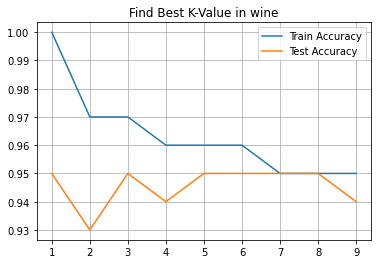

In [122]:
# k 값 선택
k_range = range(1,10)
train_score = []
test_score = []

# 모델 객체 생성 for 문 추가
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k).fit(x_tr, y_tr)   # 훈련 데이터로 훈련
    train_score.append(round(model.score(x_tr,y_tr),2))
    test_score.append(round(model.score(x_te,y_te),2))

# 학습 데이터/ 평가데이터 평가
print(train_score)
print(test_score)

# 평가 결과 시각화
plt.plot(k_range, train_score, label = 'Train Accuracy')
plt.plot(k_range, test_score, label = 'Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-Value in wine')
plt.legend()
plt.grid()
plt.show()